<a href="https://colab.research.google.com/github/XHuang2046/Covid19_Detecting_using_Xray_Image_with_CNN/blob/main/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries needed

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 40.81 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"


#set the path to the train dir
train_dir = os.path.join(main_dir,'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir,'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir,'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir,'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(487).jpg', 'COVID19(515).jpg', 'COVID-19 (8).jpeg', 'COVID-19 (192).jpg', 'COVID19(204).jpg', 'COVID19(341).jpg', 'COVID19(456).jpg', 'COVID19(271).jpg', 'COVID19(4).jpg', 'COVID19(553).jpg']
['NORMAL(404).jpg', 'NORMAL(144).jpg', 'NORMAL(1503).jpg', 'NORMAL(502).jpg', 'NORMAL(11).jpg', 'NORMAL(975).jpg', 'NORMAL(675).jpg', 'NORMAL(1318).jpg', 'NORMAL(1302).jpg', 'NORMAL(1497).jpg']
['COVID19(177).jpg', 'COVID19(197).jpg', 'COVID-19 (313).jpg', 'COVID19(215).jpg', 'COVID19(285).jpg', 'COVID-19 (475).jpg', 'COVID19(79).jpg', 'COVID19(464).jpg', 'COVID-19 (371).jpg', 'COVID-19 (754).jpg']
['NORMAL(561).jpg', 'NORMAL(136).jpg', 'NORMAL(1100).jpg', 'NORMAL(326).jpg', 'NORMAL(869).jpg', 'NORMAL(42).jpg', 'NORMAL(723).jpg', 'NORMAL(512).jpg', 'NORMAL(219).jpg', 'NORMAL(1003).jpg']


In [ ]:
#print the total no of images present in each dir
print('Images in training set: ', len(train_covid_names+train_normal_names))
print('Covid Images in train set: ' , len(train_covid_names))
print('Normal Images in train set: ' , len(train_normal_names))
print('Images in testing set: ', len(test_covid_names+test_normal_names))

Images in training set:  1811
Covid Images in train set:  545
Normal Images in train set:  1266
Images in testing set:  484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(487).jpg', '/content/datasets/Data/train/COVID19/COVID19(515).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (8).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (192).jpg', '/content/datasets/Data/train/COVID19/COVID19(204).jpg', '/content/datasets/Data/train/COVID19/COVID19(341).jpg', '/content/datasets/Data/train/COVID19/COVID19(456).jpg', '/content/datasets/Data/train/COVID19/COVID19(271).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(404).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(144).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1503).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(502).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(11).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(975).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(675).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1318).jpg']


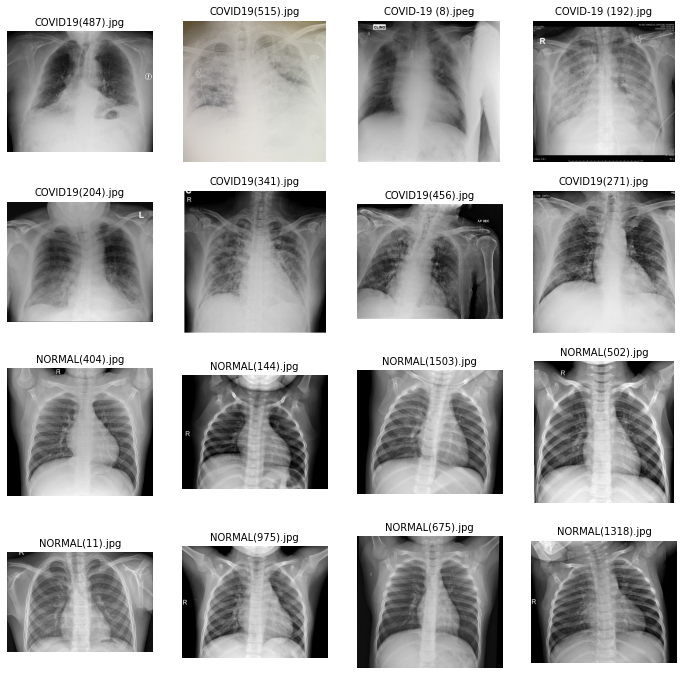

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename) for filename in train_covid_names[:8]]
normal_pic = [os.path.join(train_normal_dir,filename) for filename in train_normal_names[:8]]

#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/',6)[-1]
  sp = plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img, cmap = 'gray')
plt.show()


# Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = "binary")

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = "binary")

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),                                            
                                                 batch_size = 32,
                                                 class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), 
          padding = 'SAME', 
          activation = 'relu', 
          input_shape = [150,150,3]))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5), 
          padding = 'SAME', 
          activation = 'relu'))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5
46/46 [==============================] - 81s 1s/step - loss: 2.3291 - accuracy: 0.6468 - val_loss: 0.3660 - val_accuracy: 0.8923
Epoch 2/5
46/46 [==============================] - 49s 1s/step - loss: 0.2740 - accuracy: 0.8986 - val_loss: 0.1819 - val_accuracy: 0.9586
Epoch 3/5
46/46 [==============================] - 49s 1s/step - loss: 0.2088 - accuracy: 0.9297 - val_loss: 0.1641 - val_accuracy: 0.9558
Epoch 4/5
46/46 [==============================] - 49s 1s/step - loss: 0.1553 - accuracy: 0.9477 - val_loss: 0.2292 - val_accuracy: 0.9448
Epoch 5/5
46/46 [==============================] - 49s 1s/step - loss: 0.1596 - accuracy: 0.9322 - val_loss: 0.1090 - val_accuracy: 0.9530


# Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

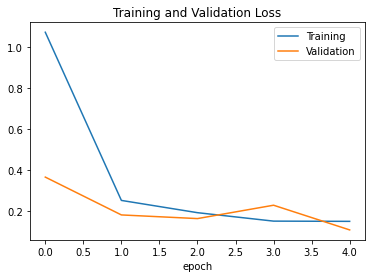

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

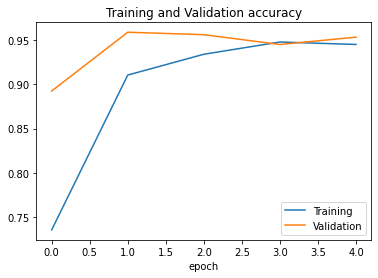

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test accuracy and loss
test_loss, test_accuracy = model.evaluate(test_generator)
print('test_loss:{} test_accuracy:{}'.format(test_loss,test_accuracy))

16/16 [==============================] - 11s 667ms/step - loss: 0.1491 - accuracy: 0.9463
test_loss:0.14905159175395966 test_accuracy:0.9462810158729553


# Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis = 0)
  predict = model.predict(images)
  print(filename)
  if predict == 0:
    print('covid')
  else:
    print('normal')

Saving covid1.jpg to covid1 (2).jpg
Saving covid2.jpeg to covid2 (2).jpeg
Saving normal1.jpg to normal1 (2).jpg
Saving normal2.jpg to normal2 (2).jpg
covid1.jpg
covid
covid2.jpeg
covid
normal1.jpg
normal
normal2.jpg
normal
